### Student Information
Name: Miguel De Oliveira

Student ID: X1110032

GitHub ID: migueldo

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Begin Assignment Here

# Part 1

https://github.com/migueldo/DM2022-Lab1-Master

# Part 2

## Data Preparation

In [1]:
# obtain the documents containing the categories provided
%load_ext autoreload
%autoreload 2

import pandas as pd

categories = ['amazon', 'imdb', 'yelp']

input_sentences = {}
# reading the dataset files as csv files using a tabulation as a delimiter and setting the column names as sentence
# and score
input_sentences['amazon'] = pd.read_csv('./sentiment_labelled_sentences/amazon_cells_labelled.txt', delimiter='\t',
                                          names=["sentence", "score"])
# setting the category and the category_name
input_sentences['amazon']['category_name'] = 'amazon'
input_sentences['amazon']['category'] = categories.index('amazon')

input_sentences['imdb'] = pd.read_csv('./sentiment_labelled_sentences/imdb_labelled.txt', delimiter='\t',
                                          names=["sentence", "score"])
input_sentences['imdb']['category_name'] = 'imdb'
input_sentences['imdb']['category'] = categories.index('imdb')

input_sentences['yelp'] = pd.read_csv('./sentiment_labelled_sentences/yelp_labelled.txt', delimiter='\t',
                                          names=["sentence", "score"])
input_sentences['yelp']['category_name'] = 'yelp'
input_sentences['yelp']['category'] = categories.index('yelp')

# concatenate all the retrived arrays in a Dataframe
sentiment_sentences = pd.concat([input_sentences['amazon'], input_sentences['imdb'], input_sentences['yelp']])

In [2]:
# Exercise 1
for index, row in sentiment_sentences.head(3).iterrows():
    print(row['sentence'], row['score'], row['category_name'], row['category'])

So there is no way for me to plug it in here in the US unless I go by a converter. 0 amazon 0
Good case, Excellent value. 1 amazon 0
Great for the jawbone. 1 amazon 0


## Data Transformation

In [3]:
# Exercise 2
sentiment_sentences.iloc[0]

sentence         So there is no way for me to plug it in here i...
score                                                            0
category_name                                               amazon
category                                                         0
Name: 0, dtype: object

In [4]:
#Exercise 3
sentiment_sentences[sentiment_sentences['category_name']=='yelp'].iloc[::10][0:5]

sentence  score category_name  \
0                            Wow... Loved this place.      1          yelp   
10                           Service was very prompt.      1          yelp   
20                                The Burrittos Blah!      0          yelp   
30  Also there are combos like a burger, fries, an...      1          yelp   
40                       The shrimp tender and moist.      1          yelp   

    category  
0          2  
10         2  
20         2  
30         2  
40         2

## Data Mining using Pandas

In [5]:
import helpers.data_mining_helpers as dmh

# check missing values
sentiment_sentences.isnull()

sentiment_sentences.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                            category  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [6]:
#Exercise 4
sentiment_sentences.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [7]:
#Exercise 5
# Not relevant

In [8]:
sum(sentiment_sentences.duplicated())

17

In [9]:
print("[BEFORE CLEANING] {} - {}".format(len(sentiment_sentences), sum(sentiment_sentences.duplicated())))
sentiment_sentences.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
print("[AFTER CLEANING] {} - {}".format(len(sentiment_sentences), sum(sentiment_sentences.duplicated())))

[BEFORE CLEANING] 2748 - 17
[AFTER CLEANING] 2714 - 0


## Data Preprocessing

In [10]:
sentiment_sentences_sample = sentiment_sentences.sample(n=1000) #random state
print("[len]: {}".format(len(sentiment_sentences_sample)))
sentiment_sentences_sample[0:4]

[len]: 1000


sentence  score category_name  \
348              5 stars for the brick oven bread app!      1          yelp   
930                                  Never got it!!!!!      0        amazon   
501            I'd rather eat airline food, seriously.      0          yelp   
719  We ordered some old classics and some new dish...      0          yelp   

     category  
348         2  
930         0  
501         2  
719         2

In [11]:
#Exercise 6
# not relevant here

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp      992
amazon    980
imdb      742
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

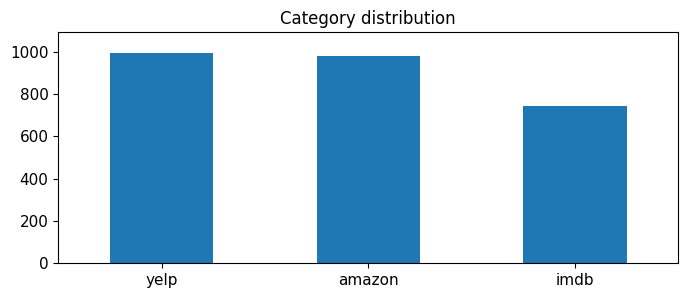

In [13]:
print(sentiment_sentences.category_name.value_counts())
y_lim = max(sentiment_sentences.category_name.value_counts())

# plot barchart for X
sentiment_sentences.category_name.value_counts().plot(kind = 'bar',
                                                      title = 'Category distribution',
                                                      ylim = [0, y_lim + 0.1*y_lim],
                                                      rot = 0, fontsize = 11, figsize = (8,3))

yelp      372
amazon    356
imdb      272
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution (sampled)'}>

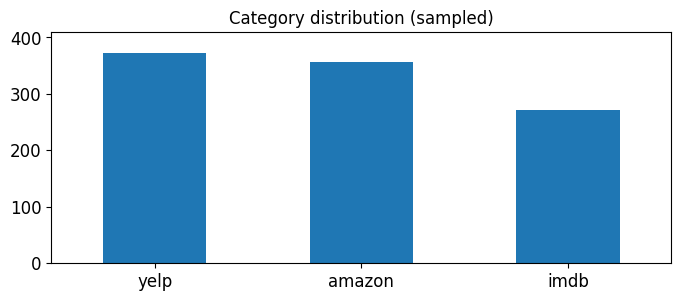

In [14]:
print(sentiment_sentences_sample.category_name.value_counts())
y_lim = max(sentiment_sentences_sample.category_name.value_counts())

# plot barchart for X_sample
sentiment_sentences_sample.category_name.value_counts().plot(kind = 'bar',
                                                             title = 'Category distribution (sampled)',
                                                             ylim = [0, y_lim + 0.1*y_lim], 
                                                             rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot: title={'center': 'Category distribution (sampled)'}>

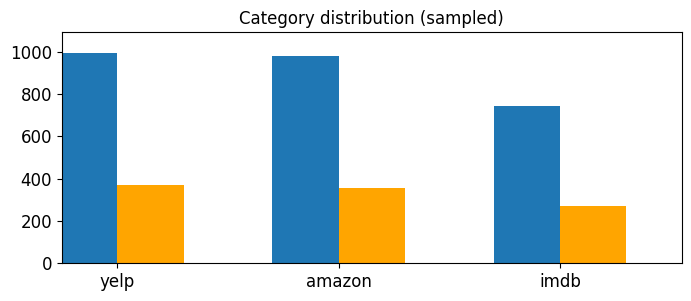

In [15]:
#Exercise 8
y_lim = max(sentiment_sentences.category_name.value_counts())

sentiment_sentences.category_name.value_counts().plot(kind = 'bar',
                                                      title = 'Category distribution',
                                                      ylim = [0, y_lim + 0.1*y_lim], width=0.3,
                                                      rot = 0, fontsize = 11, figsize = (8,3), position=1)
sentiment_sentences_sample.category_name.value_counts().plot(kind = 'bar',
                                                             title = 'Category distribution (sampled)',
                                                             ylim = [0, y_lim + 0.1*y_lim], 
                                                             width=0.3, color='orange',
                                                             rot = 0, fontsize = 12, figsize = (8,3), position=0)

In [16]:
import nltk
sentiment_sentences['unigrams'] = sentiment_sentences['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [17]:
sentiment_sentences[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [18]:
sentiment_sentences[0:4]

sentence  score category_name  \
0  So there is no way for me to plug it in here i...      0        amazon   
1                        Good case, Excellent value.      1        amazon   
2                             Great for the jawbone.      1        amazon   
3  Tied to charger for conversations lasting more...      0        amazon   

   category                                           unigrams  
0         0  [So, there, is, no, way, for, me, to, plug, it...  
1         0               [Good, case, ,, Excellent, value, .]  
2         0                      [Great, for, the, jawbone, .]  
3         0  [Tied, to, charger, for, conversations, lastin...

In [19]:
list(sentiment_sentences[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentiment_sentences_counts = count_vect.fit_transform(sentiment_sentences.sentence) #learn the vocabulary and return document-term matrix
print(sentiment_sentences_counts[0])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [21]:
#analyze(sentiment_sentences.text[0])

In [22]:
#Exercise 9
analyze = count_vect.build_analyzer()
analyze(sentiment_sentences.iloc[0].sentence)

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [23]:
print("[SHAPE] {}".format(sentiment_sentences_counts.shape))
print("[FEATURE NAMES] {}".format(count_vect.get_feature_names_out()[0:10]))
sentiment_sentences_counts[0:5, 0:100].toarray()

[SHAPE] (2714, 5153)
[FEATURE NAMES] ['00' '10' '100' '11' '12' '13' '15' '15g' '15pm' '17']


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [24]:
#Exercise 10
import numpy as np
from collections import Counter
print(np.where(sentiment_sentences_counts[0:100, 0:1000].toarray() == 1))
indexes = np.where(sentiment_sentences_counts[0:100, 0:1000].toarray() == 1)[0] #gets me all the indexes with a 1 in the first 1000 values 
indexes = [item for item, count in Counter(indexes).items() if count > 1] #gets me all the indexes with at least 2 '1' in the array
print(indexes)

index = np.where(sentiment_sentences_counts[indexes[0], 0:1000].toarray() == 1)[1][1] #I recover the index of the 2nd 1 in the 3rd array
count_vect.get_feature_names_out()[index]

(array([ 0,  1,  3,  3,  6,  6,  7,  9, 10, 12, 12, 14, 14, 14, 14, 14, 15,
       15, 16, 16, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 22,
       22, 23, 23, 23, 24, 25, 25, 25, 28, 29, 29, 30, 31, 31, 32, 32, 33,
       33, 33, 34, 34, 34, 37, 37, 37, 39, 39, 39, 39, 40, 42, 43, 44, 45,
       45, 46, 46, 47, 48, 49, 50, 50, 51, 52, 52, 54, 54, 56, 57, 57, 57,
       57, 57, 58, 58, 58, 58, 59, 60, 61, 61, 61, 62, 62, 63, 63, 63, 64,
       64, 64, 64, 65, 65, 66, 66, 66, 70, 71, 73, 75, 75, 77, 78, 79, 80,
       81, 81, 81, 82, 83, 83, 83, 84, 84, 86, 87, 87, 87, 89, 89, 92, 94,
       95, 95, 96, 96, 97, 97]), array([646, 712,  45, 767, 646, 986, 273, 216, 216, 216, 646, 179, 297,
       314, 855, 896, 243, 514, 146, 416, 850, 156, 179, 216, 637,  80,
       216, 558, 273, 908, 216, 397, 412, 457, 770, 216, 412, 558, 888,
       216, 466, 673, 765, 573, 637, 273, 314, 691, 216, 999,  84, 273,
       691, 314, 412, 538,  54, 216, 712,  33, 273, 669, 844, 646, 333,
      

'charger'

In [25]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[640:660]]
plot_y = ["doc_"+ str(i) for i in list(sentiment_sentences.index)[0:20]]
plot_z = sentiment_sentences_counts[0:20, 640:660].toarray() #sentiment_sentences_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

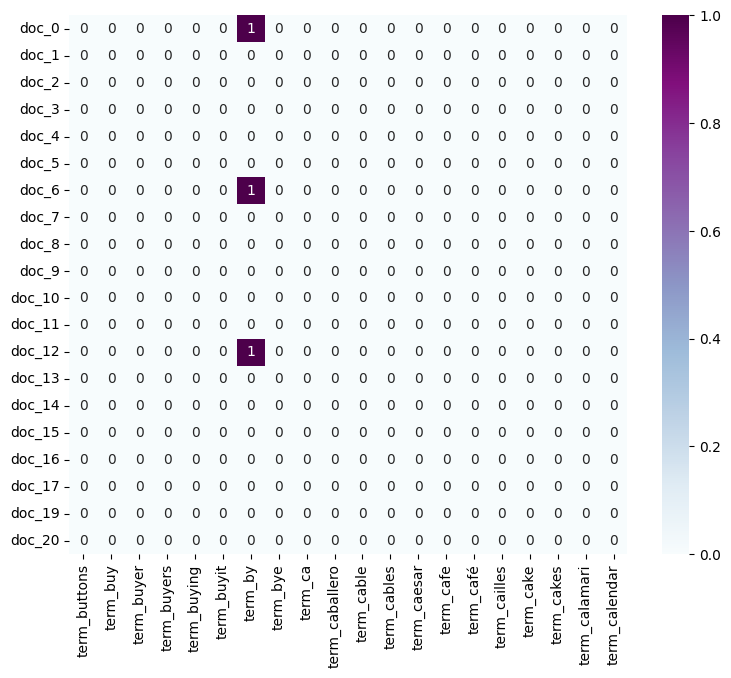

In [26]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="BuPu", vmin=0, vmax=1, annot=True)

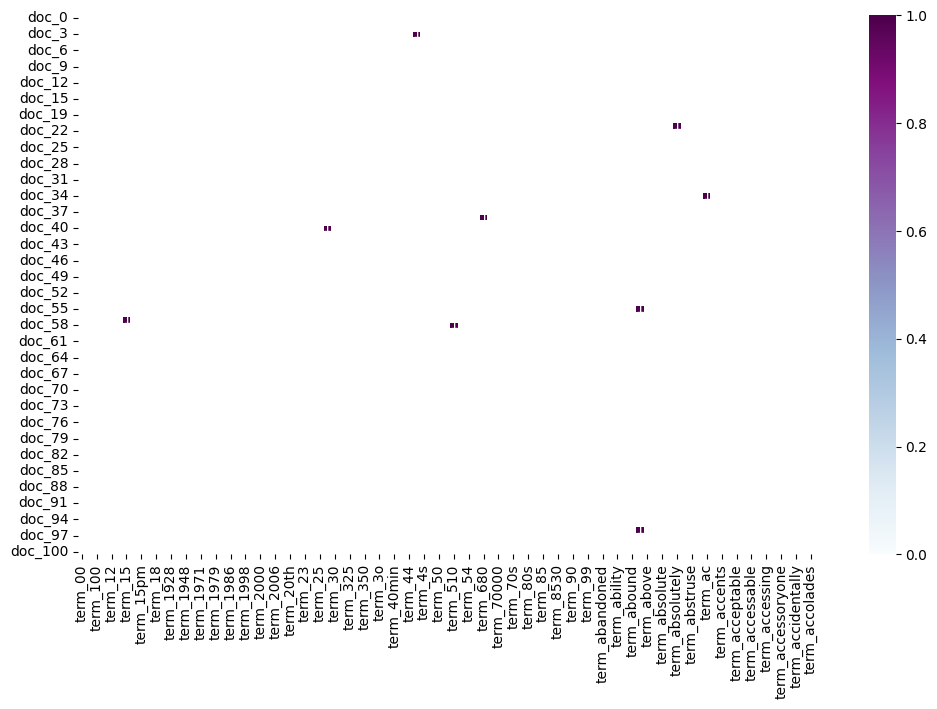

In [27]:
#Exercise 11
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+str(i) for i in list(sentiment_sentences.index)[0:100]]
plot_z = sentiment_sentences_counts[0:100, 0:100].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
df_todraw[df_todraw == 0] = None

plt.subplots(figsize=(12, 7))
ax = sns.heatmap(df_todraw, cmap="BuPu", vmin=0, vmax=1, annot=True, mask=df_todraw.isnull())

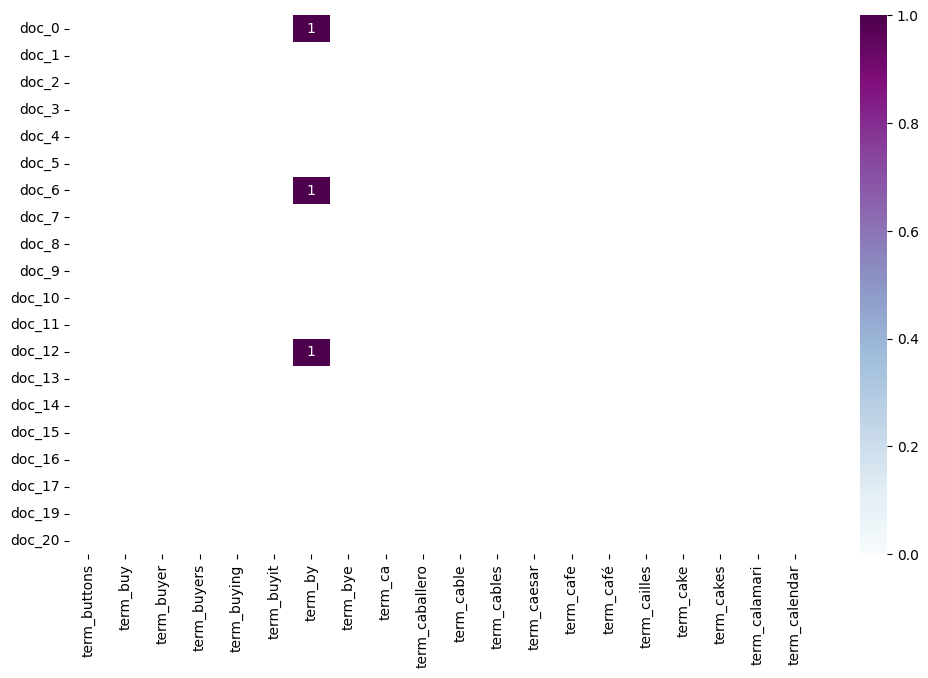

In [28]:
# Same code but zoomed as a POC
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[640:660]]
plot_y = ["doc_"+str(i) for i in list(sentiment_sentences.index)[0:20]]
plot_z = sentiment_sentences_counts[0:20, 640:660].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
df_todraw[df_todraw == 0] = None

plt.subplots(figsize=(12, 7))
ax = sns.heatmap(df_todraw, cmap="BuPu", vmin=0, vmax=1, annot=True, mask=df_todraw.isnull())

In [29]:
from sklearn.decomposition import PCA
sentiment_sentences_reduced = PCA(n_components = 2).fit_transform(sentiment_sentences_counts.toarray())
sentiment_sentences_reduced.shape

(2714, 2)

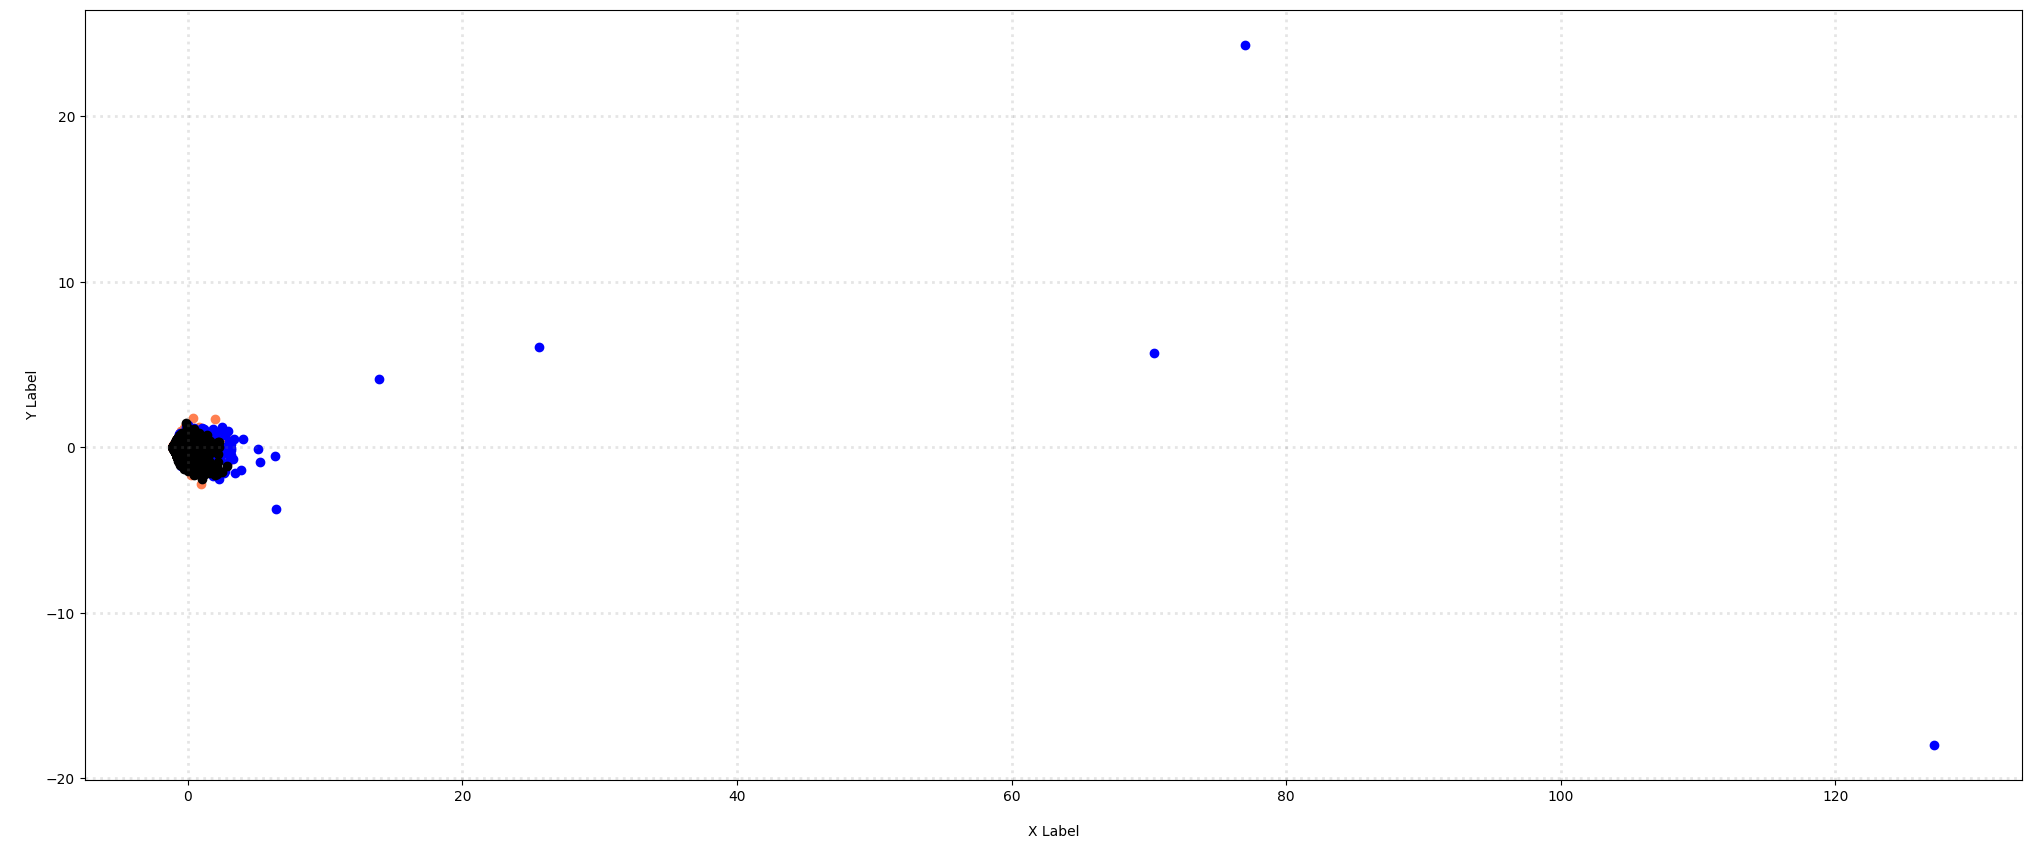

In [30]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[0]
    ys = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [31]:
#Exercise 12
sentiment_sentences_reduced = PCA(n_components = 3).fit_transform(sentiment_sentences_counts.toarray())

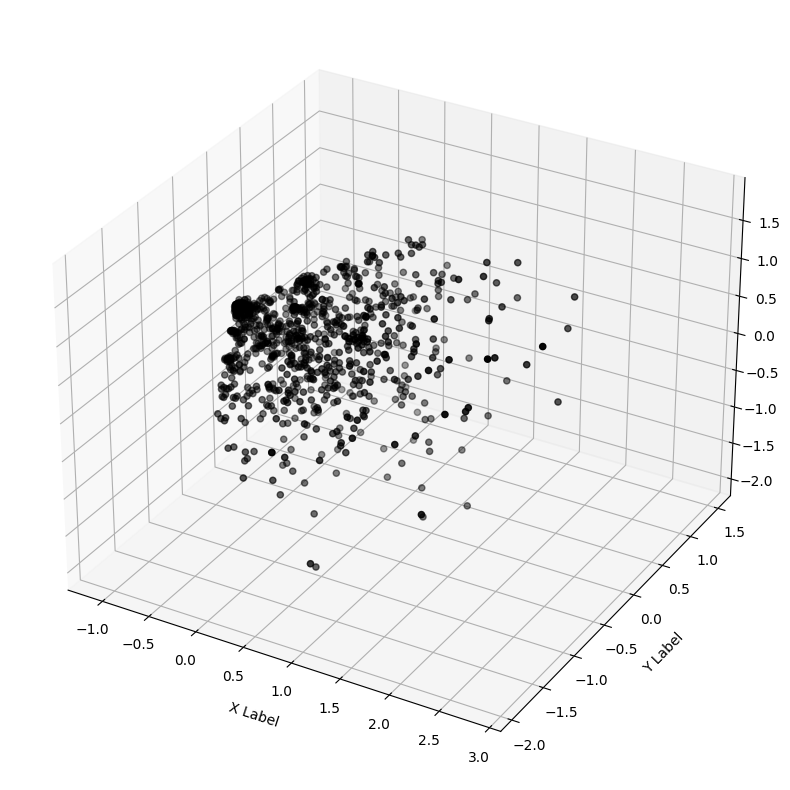

In [32]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[0]
    ys = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[1]
    zs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[2]
   
ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

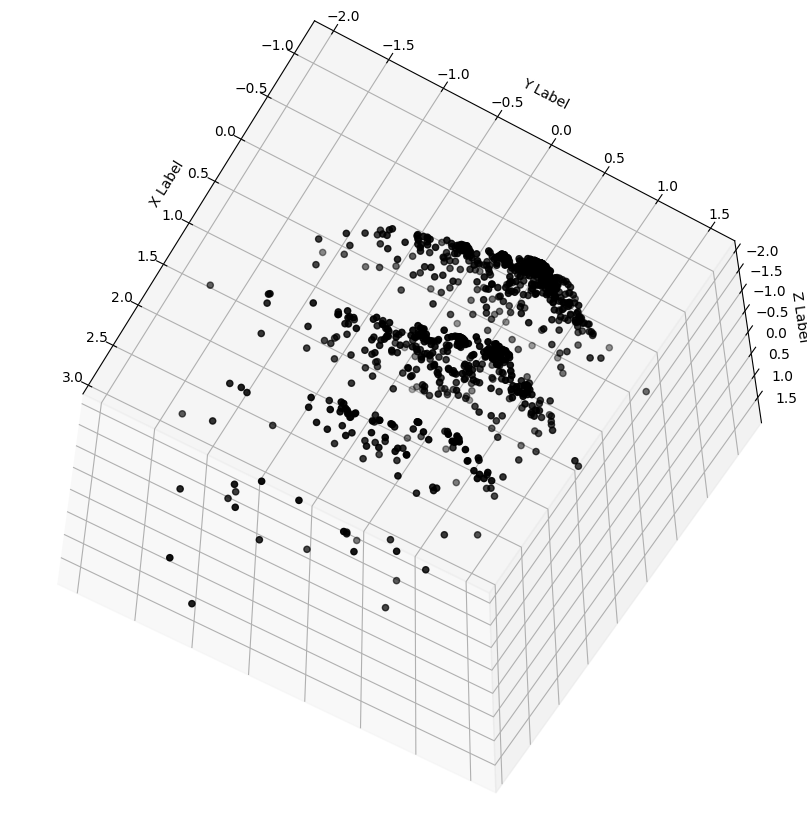

In [33]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[0]
    ys = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[1]
    zs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[2]
   
ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(120, 30)
plt.show()

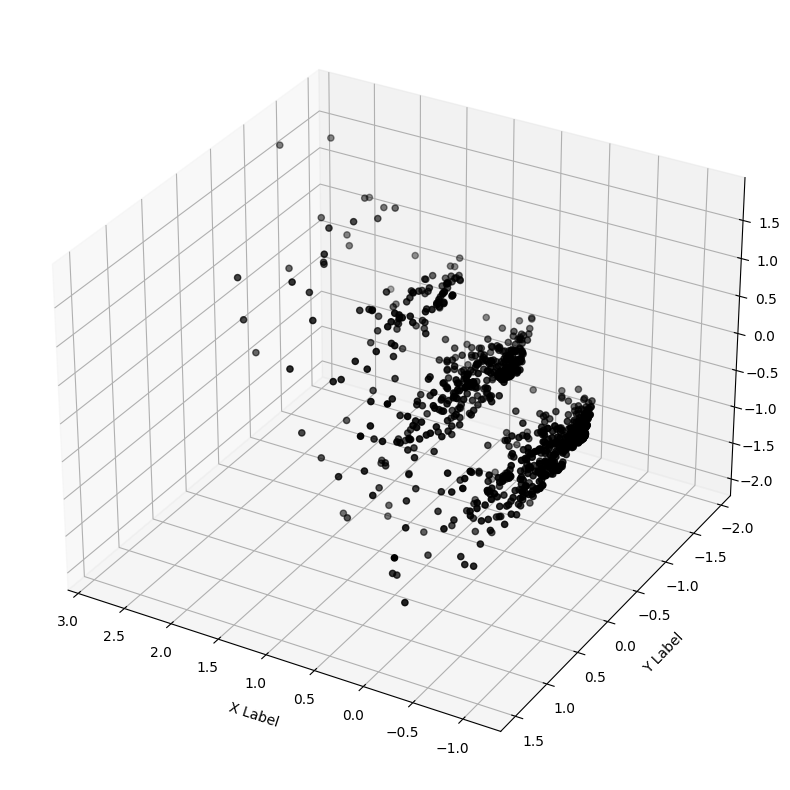

In [34]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[0]
    ys = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[1]
    zs = sentiment_sentences_reduced[sentiment_sentences['category_name'] == category].T[2]
   
ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(30, 120)
plt.show()

In [35]:
#Analyzing Exercise 12
# Here compared to the first dataset we can cleary see a difference in the 3d representations compared to the 2D.
# In the 2D it seems like we only have 1 group however from the 3D one we can clearly distinguish 3 groups.

[SUM] 1


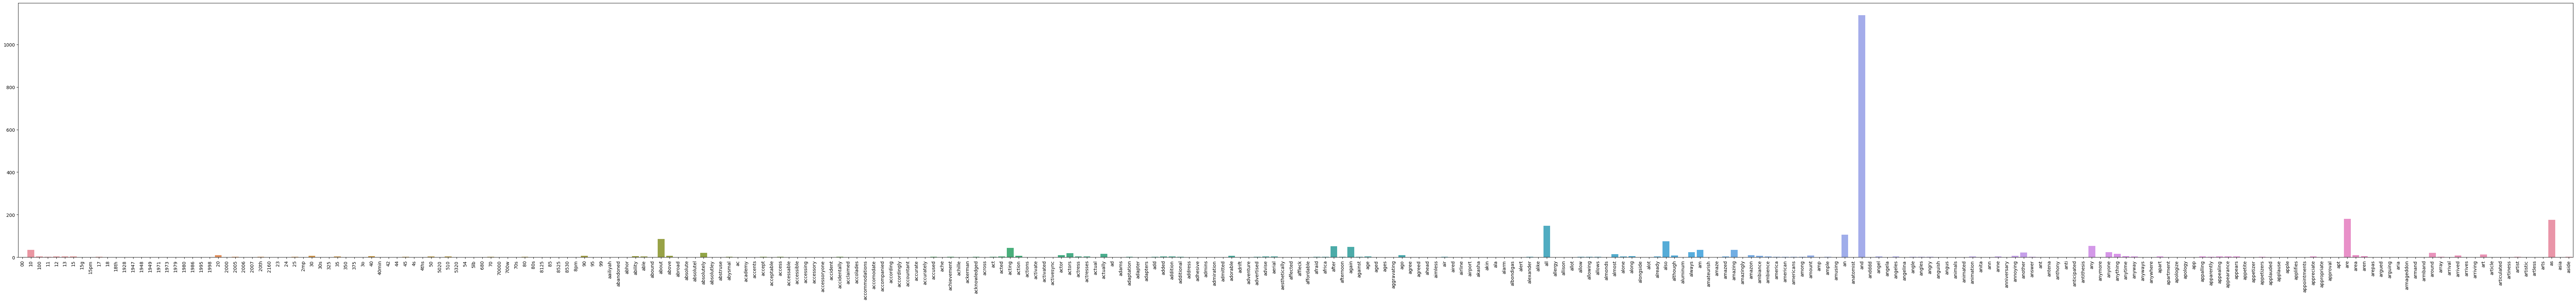

In [36]:
term_frequencies = []
for j in range(0,sentiment_sentences_counts.shape[1]):
    term_frequencies.append(sum(sentiment_sentences_counts[:,j].toarray()))
term_frequencies = np.asarray(sentiment_sentences_counts.sum(axis=0))[0]
print("[SUM] {}".format(term_frequencies[0])) #sum of first term: 00

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [37]:
# Exercise 13
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

In [38]:
#Exercise 14
import plotly.express as px

indexes = []
for idx, term in enumerate(term_frequencies):
    if term <= 5:
        indexes.append(idx)

x_arr = np.delete(count_vect.get_feature_names_out(), indexes)
y_arr = np.delete(term_frequencies, indexes)
print(len(count_vect.get_feature_names_out()))
print(len(x_arr))  
fig = px.bar(x=x_arr, y=y_arr)
fig.show()

5153
732


In [39]:
#Exercise 15
from itertools import islice

dict_df = {}
for count, term in zip(count_vect.get_feature_names_out(), term_frequencies):
    dict_df[count] = term
    
dict_df = {k: v for k, v in sorted(dict_df.items(), key=lambda item: item[1])[::-1]} #sort the dict in reverse order based on the values
x_arr = list(dict_df.keys())[:300]
y_arr = list(dict_df.values())[:300]
fig = px.area(x=x_arr, y=y_arr)
fig.show()

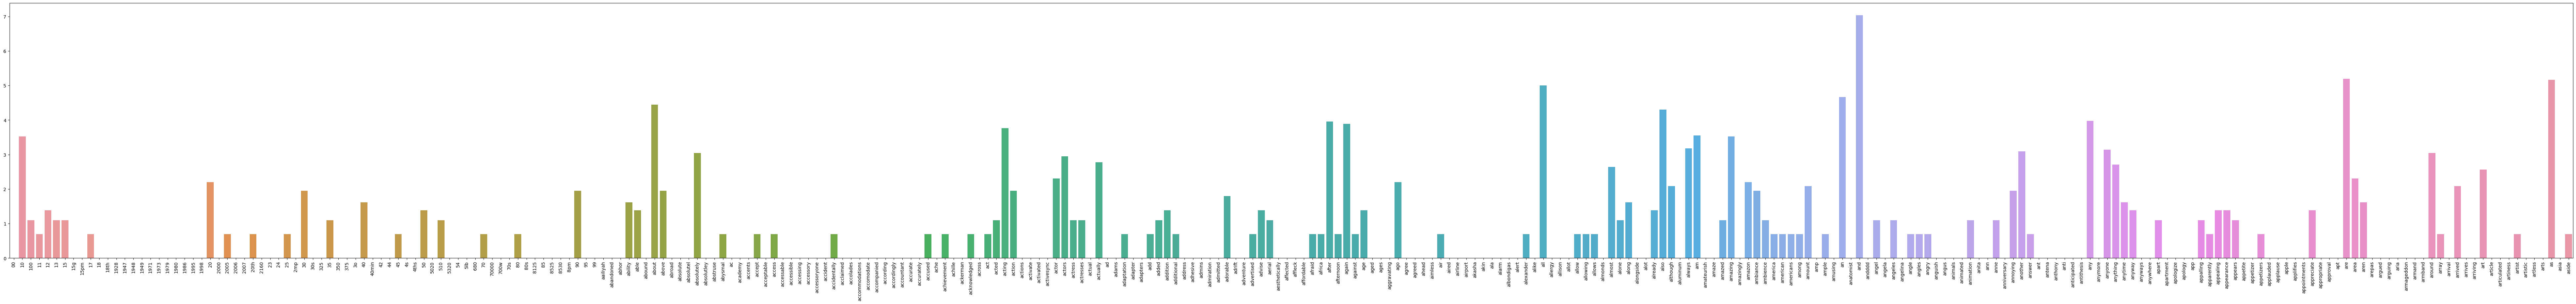

In [40]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [41]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_sentences.category)
sentiment_sentences['bin_category'] = mlb.transform(sentiment_sentences['category']).tolist()
sentiment_sentences.sample(frac=1)[0:9]

sentence  score category_name  \
271       You cant go wrong with any of the food here.      1          yelp   
423  A mature, subtle script that suggests and occa...      1          imdb   
493  I had Verizon 2 years ago and really liked the...      1        amazon   
685  They are so easy to love, but even more easy t...      1          imdb   
711    The film's dialogue is natural, real to life.        1          imdb   
75   I guess that nobody at the network that aired ...      0          imdb   
194                                     Not impressed.      0        amazon   
242  By this time our side of the restaurant was al...      0          yelp   
710     Can't store anything but phone numbers to SIM.      0        amazon   

     category                                           unigrams bin_category  
271         2  [You, cant, go, wrong, with, any, of, the, foo...    [0, 0, 1]  
423         1  [A, mature, ,, subtle, script, that, suggests,...    [0, 1, 0]  
493         0  [I, had, Verizon, 2, years, ago, and, really, ...    [1, 0, 0]  
685         1  [They, are, so, easy, to, love, ,, but, even, ...    [0, 1, 0]  
711         1  [The, film, 's, dialogue, is, natural, ,, real...    [0, 1, 0]  
75          1  [I, guess, that, nobody, at, the, network, tha...    [0, 1, 0]  
194         0                                [Not, impressed, .]    [1, 0, 0]  
242         2  [By, this, time, our, side, of, the, restauran...    [0, 0, 1]  
710         0  [Ca, n't, store, anything, but, phone, numbers...    [1, 0, 0]

In [42]:
#Exercise 16
sentiment_sentences['bin_category'] = mlb.transform(sentiment_sentences['category_name']).tolist()
sentiment_sentences.sample(frac=1)[0:9]

sentence  score category_name  \
417                                      VERY funny!        1          imdb   
289  Lifetime does not air it enough, so if anyone ...      1          imdb   
8                            The fries were great too.      1          yelp   
167  The look of it is very sharp and the screen is...      1        amazon   
500         It's a case of 'so bad it is laughable'.        0          imdb   
317  This is definitely a must have if your state d...      1        amazon   
70   There were several moments in the movie that j...      0          imdb   
729                I keep watching it over and over.        1          imdb   
563  If you are looking for a good quality Motorola...      0        amazon   

     category                                           unigrams bin_category  
417         1                                   [VERY, funny, !]    [0, 0, 0]  
289         1  [Lifetime, does, not, air, it, enough, ,, so, ...    [0, 0, 0]  
8           2                  [The, fries, were, great, too, .]    [0, 0, 0]  
167         0  [The, look, of, it, is, very, sharp, and, the,...    [0, 0, 0]  
500         1  [It, 's, a, case, of, 'so, bad, it, is, laugha...    [0, 0, 0]  
317         0  [This, is, definitely, a, must, have, if, your...    [0, 0, 0]  
70          1  [There, were, several, moments, in, the, movie...    [0, 0, 0]  
729         1        [I, keep, watching, it, over, and, over, .]    [0, 0, 0]  
563         0  [If, you, are, looking, for, a, good, quality,...    [0, 0, 0]

In [43]:
# first we create a mapping array
map_arr = ['amazon', 'imdb', 'yelp']
# then we map the array index to the category name and we binarize using the index
sentiment_sentences['bin_category'] = mlb.transform([map_arr.index(bin_cat) for bin_cat in sentiment_sentences['category_name'] ]).tolist()

sentiment_sentences.sample(frac=1)[0:9]

sentence  score category_name  \
296  Before I go in to why I gave a 1 star rating p...      0          yelp   
830                     Unfortunately it did not work.      0        amazon   
91   It's like a really sexy party in your mouth, w...      1          yelp   
488  It was attached to a gas station, and that is ...      0          yelp   
172                  The waitresses are very friendly.      1          yelp   
289  Lifetime does not air it enough, so if anyone ...      1          imdb   
104  This is one of the better buffets that I have ...      1          yelp   
864  But, in any case, the best part is, you can do...      1        amazon   
672    As a sushi lover avoid this place by all means.      0          yelp   

     category                                           unigrams bin_category  
296         2  [Before, I, go, in, to, why, I, gave, a, 1, st...    [0, 0, 1]  
830         0             [Unfortunately, it, did, not, work, .]    [1, 0, 0]  
91          2  [It, 's, like, a, really, sexy, party, in, you...    [0, 0, 1]  
488         2  [It, was, attached, to, a, gas, station, ,, an...    [0, 0, 1]  
172         2          [The, waitresses, are, very, friendly, .]    [0, 0, 1]  
289         1  [Lifetime, does, not, air, it, enough, ,, so, ...    [0, 1, 0]  
104         2  [This, is, one, of, the, better, buffets, that...    [0, 0, 1]  
864         0  [But, ,, in, any, case, ,, the, best, part, is...    [1, 0, 0]  
672         2  [As, a, sushi, lover, avoid, this, place, by, ...    [0, 0, 1]

## Data exploration

In [44]:
document_to_transform_1 = []
random_record_1 = sentiment_sentences.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sentiment_sentences.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sentiment_sentences.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [45]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Part 3

## Usefull visualisations
### N-gram word cloud

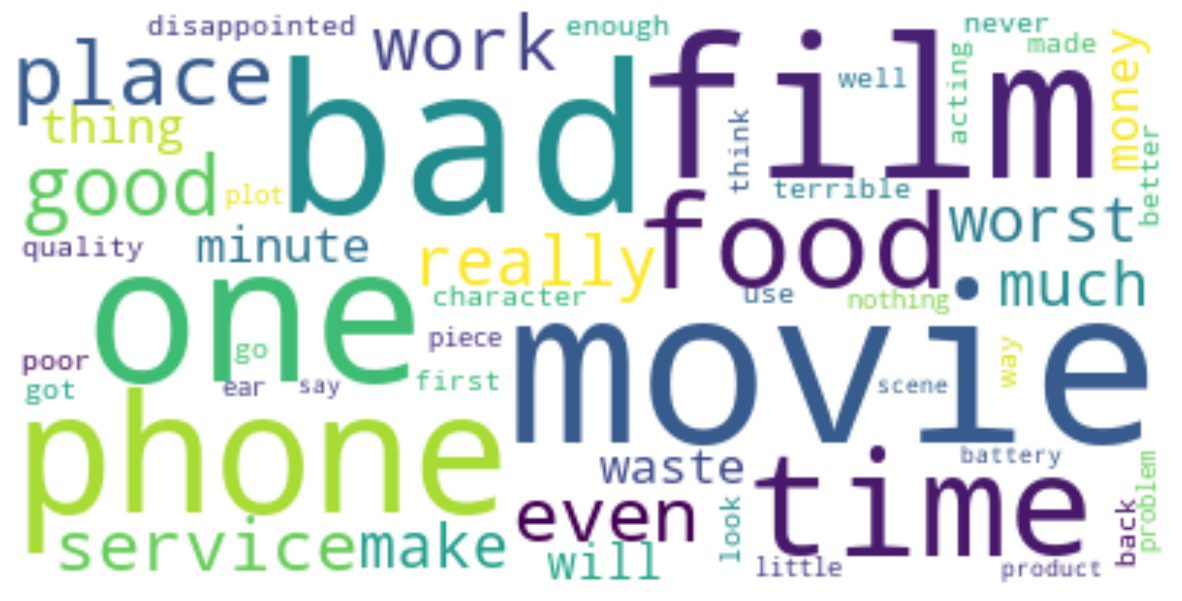

In [47]:
#most frequent words in negative comments are bigger
from wordcloud import WordCloud

neg_records = sentiment_sentences[sentiment_sentences['score']==0]
text = " ".join(i for i in neg_records.sentence)

wordcloud = WordCloud(max_font_size=75, max_words=50, background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

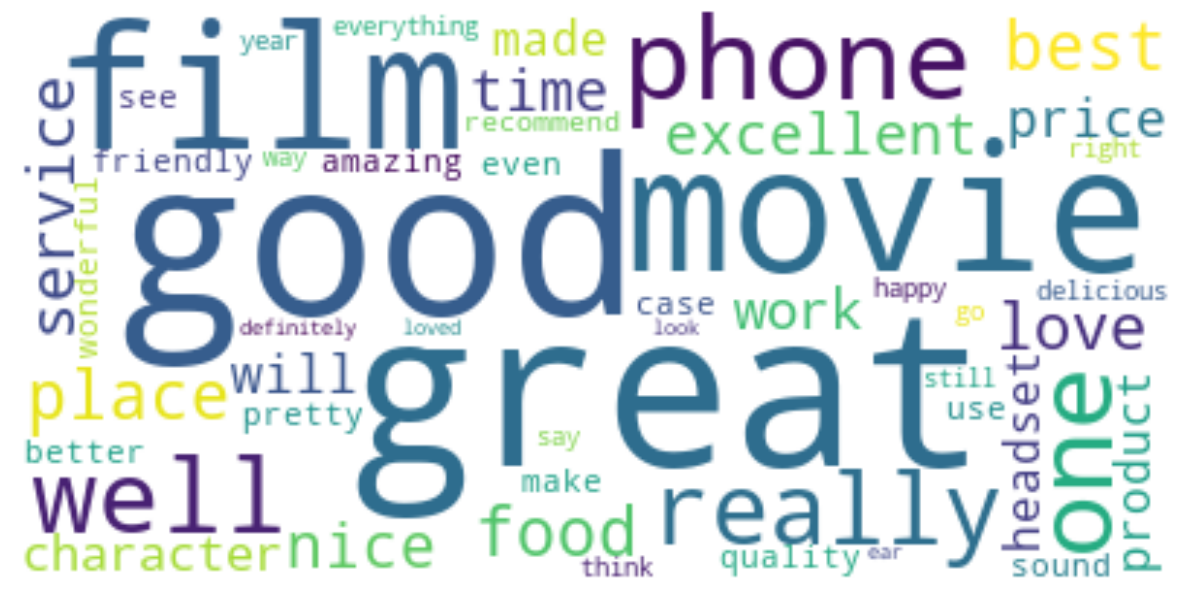

In [48]:
#most frequent words in positive comments are bigger
pos_records = sentiment_sentences[sentiment_sentences['score']==1]
text = " ".join(i for i in pos_records.sentence)

wordcloud = WordCloud(max_font_size=75, max_words=50, background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Packed bubble chart

In [49]:
from nltk.corpus import stopwords

nltk.download('stopwords')
sw_nltk = stopwords.words('english') + list(str(range(10)))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lamachine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [51]:
neg_records = sentiment_sentences[sentiment_sentences['score']==0]
neg_counts = count_vect.fit_transform(neg_records.sentence)
neg_frequencies = []

for j in range(0, neg_counts.shape[1]):
    neg_frequencies.append(sum(neg_counts[:,j].toarray()))
neg_frequencies = np.asarray(neg_counts.sum(axis=0))[0]

neg_dict = {}
for count, term in zip(count_vect.get_feature_names_out(), neg_frequencies):
    neg_dict[count] = term
    
neg_dict = {k: v for k, v in sorted(dict_df.items(), key=lambda item: item[1])[::-1]} #sort the dict in reverse order based on the values

text =[]
for sentence in neg_records.sentence:
    text += [word.replace('.', '') for word in sentence.split() if word.lower() not in sw_nltk]

neg_dict = {}
for word in text:
    if word not in neg_dict: neg_dict[word] = 0
    neg_dict[word] = neg_dict[word] + 1
neg_dict = {k: v for k, v in sorted(neg_dict.items(), key=lambda item: item[1])[::-1]}

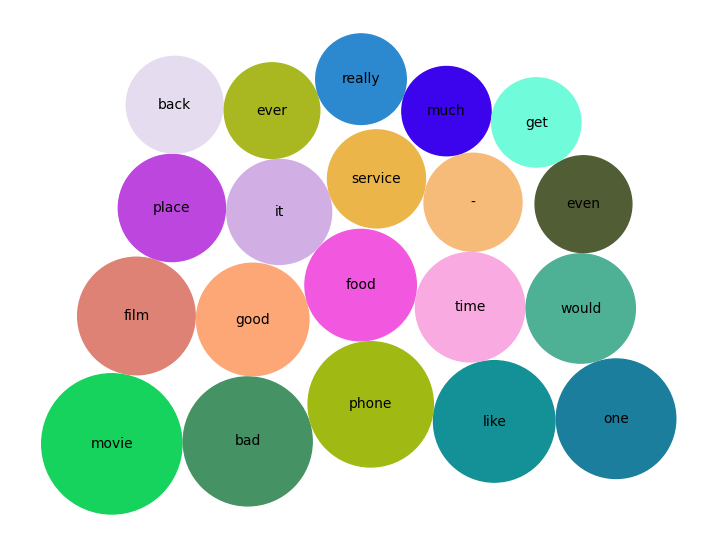

In [52]:
import random

bubble_chart = BubbleChart(area=list(neg_dict.values())[:20], bubble_spacing=0.1)
bubble_chart.collapse()

colors = colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]) for i in range(20)]


fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13)
bubble_chart.plot(ax, list(neg_dict.keys())[:20], colors=colors)

ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

In [53]:
pos_records = sentiment_sentences[sentiment_sentences['score']==1]
pos_counts = count_vect.fit_transform(pos_records.sentence)
pos_frequencies = []

for j in range(0, pos_counts.shape[1]):
    pos_frequencies.append(sum(pos_counts[:,j].toarray()))
pos_frequencies = np.asarray(pos_counts.sum(axis=0))[0]

pos_dict = {}
for count, term in zip(count_vect.get_feature_names_out(), pos_frequencies):
    pos_dict[count] = term
    
pos_dict = {k: v for k, v in sorted(dict_df.items(), key=lambda item: item[1])[::-1]} #sort the dict in reverse order based on the values

text =[]
for sentence in pos_records.sentence:
    text += [word.replace('.', '') for word in sentence.split() if word.lower() not in sw_nltk]

pos_dict = {}
for word in text:
    if word not in pos_dict: pos_dict[word] = 0
    pos_dict[word] = pos_dict[word] + 1
pos_dict = {k: v for k, v in sorted(pos_dict.items(), key=lambda item: item[1])[::-1]}

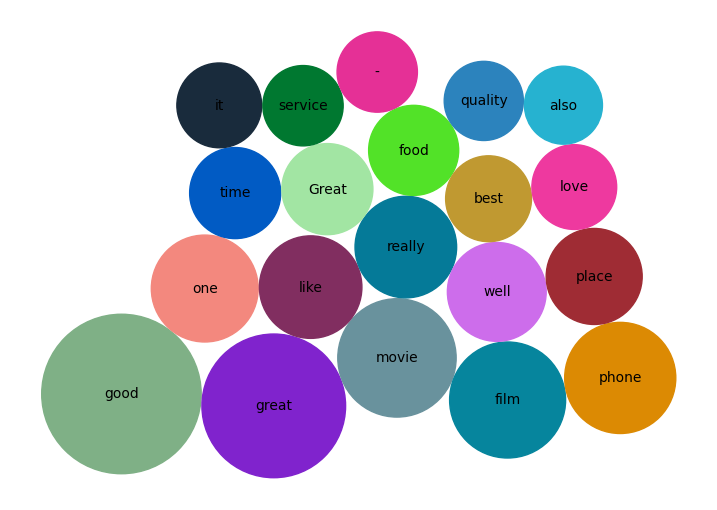

In [54]:
bubble_chart = BubbleChart(area=list(pos_dict.values())[:20], bubble_spacing=0.1)
bubble_chart.collapse()

colors = colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]) for i in range(20)]


fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13)
bubble_chart.plot(ax, list(pos_dict.keys())[:20], colors=colors)

ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

In [55]:
# Analysis
# This second representation doesn't work very well in this case as most usefull words have approximatly the same
# number of occurences. The result would have been better if some words were very present compared to the others.

### Pie chart

In [56]:
df_dict = {"word": [], "count": []}
for word in neg_dict:
    df_dict["word"].append(word)
    df_dict["count"].append(neg_dict[word])

df = pd.DataFrame.from_dict(df_dict)

fig = px.pie(df[:20], values='count', names='word', title='Most frequent words in the negative category (top 20)', hole=.5)
fig.show()

In [57]:
df_dict = {"word": [], "count": []}
for word in pos_dict:
    df_dict["word"].append(word)
    df_dict["count"].append(pos_dict[word])

df = pd.DataFrame.from_dict(df_dict)

fig = px.pie(df[:20], values='count', names='word', title='Most frequent words in the positive category (top 20)', hole=.5)
fig.show()

## TF-IDF features

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer()
tf_counts = tf_vect.fit_transform(sentiment_sentences.sentence)
tf_df = pd.DataFrame(tf_counts.toarray().transpose(), index=tf_vect.get_feature_names_out())
tf_df

0     1     2     3     4     5     6     7     8     9     ...  \
00        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
100       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
z500a     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zero      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zillion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zombie    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zombiez   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

         2704  2705  2706  2707  2708  2709  2710  2711  2712  2713  
00        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
100       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
z500a     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zero      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zillion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zombie    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zombiez   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5153 rows x 2714 columns]

In [59]:
tf_freq = []
for j in range(0, tf_counts.shape[1]):
    tf_freq.append(sum(tf_counts[:,j].toarray()))
tf_freq = np.asarray(tf_counts.sum(axis=0))[0]

fig = px.bar(x=tf_vect.get_feature_names_out()[:300], y=tf_freq[:300])
fig.show()

In [60]:
idf_vect = TfidfVectorizer(use_idf=True)
idf_counts = idf_vect.fit_transform(sentiment_sentences.sentence)
idf_df = pd.DataFrame(idf_counts.toarray().transpose(), index=idf_vect.get_feature_names_out())
idf_df

0     1     2     3     4     5     6     7     8     9     ...  \
00        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
100       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
z500a     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zero      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zillion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zombie    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zombiez   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

         2704  2705  2706  2707  2708  2709  2710  2711  2712  2713  
00        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
100       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
z500a     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zero      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zillion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zombie    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zombiez   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5153 rows x 2714 columns]

In [61]:
idf_freq = []
for j in range(0, idf_counts.shape[1]):
    idf_freq.append(sum(idf_counts[:,j].toarray()))
idf_freq = np.asarray(idf_counts.sum(axis=0))[0]

fig = px.bar(x=idf_vect.get_feature_names_out()[:300], y=idf_freq[:300])
fig.show()

##  Naive Bayes classifier

### Bernouilli

In [62]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = count_vect.fit_transform(sentiment_sentences.sentence)
Y = sentiment_sentences['score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb_score = bnb.score(X_test, Y_test)
print("[BNB SCORE] {}".format(bnb_score))
Y_pred = bnb.predict(X_train)

Y_pred = bnb.predict(X_train)  
acc_score = accuracy_score(Y_train, Y_pred) 
print("[TRAINING ACCURACY] {}".format(acc_score))

[BNB SCORE] 0.8085419734904271
[TRAINING ACCURACY] 0.9513513513513514


In [63]:
X = idf_vect.fit_transform(sentiment_sentences.sentence)
Y = sentiment_sentences['score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

bnb.fit(X_train, Y_train)
bnb_score = bnb.score(X_test, Y_test)
print("[BNB SCORE] {}".format(bnb_score))
Y_pred = bnb.predict(X_train)

Y_pred = bnb.predict(X_train)  
acc_score = accuracy_score(Y_train, Y_pred) 
print("[TRAINING ACCURACY] {}".format(acc_score))

[BNB SCORE] 0.8070692194403535
[TRAINING ACCURACY] 0.9434889434889435


### Multinomial

In [64]:
from sklearn.naive_bayes import MultinomialNB

X = count_vect.fit_transform(sentiment_sentences.sentence)
Y = sentiment_sentences['score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb_score = mnb.score(X_test, Y_test)
print("[MNB SCORE] {}".format(mnb_score))
Y_pred = mnb.predict(X_train)

Y_pred = mnb.predict(X_train)  
acc_score = accuracy_score(Y_train, Y_pred) 
print("[TRAINING ACCURACY] {}".format(acc_score))

[MNB SCORE] 0.8085419734904271
[TRAINING ACCURACY] 0.942997542997543


In [65]:
X = idf_vect.fit_transform(sentiment_sentences.sentence)
Y = sentiment_sentences['score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

mnb.fit(X_train, Y_train)
mnb_score = mnb.score(X_test, Y_test)
print("[MNB SCORE] {}".format(mnb_score))
Y_pred = mnb.predict(X_train)

Y_pred = mnb.predict(X_train)  
acc_score = accuracy_score(Y_train, Y_pred) 
print("[TRAINING ACCURACY] {}".format(acc_score))

[MNB SCORE] 0.8394698085419735
[TRAINING ACCURACY] 0.9542997542997543


### Gaussian

In [66]:
from sklearn.naive_bayes import GaussianNB

X = count_vect.fit_transform(sentiment_sentences.sentence)
Y = sentiment_sentences['score']
X_train, X_test, Y_train, Y_test = train_test_split(X.toarray(), Y, test_size=0.25)

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_score = mnb.score(X_test, Y_test)
print("[GNB SCORE] {}".format(gnb_score))
Y_pred = gnb.predict(X_train)

Y_pred = gnb.predict(X_train)  
acc_score = accuracy_score(Y_train, Y_pred) 
print("[TRAINING ACCURACY] {}".format(acc_score))

[GNB SCORE] 0.9101620029455081
[TRAINING ACCURACY] 0.9022113022113022


In [67]:
X = idf_vect.fit_transform(sentiment_sentences.sentence)
Y = sentiment_sentences['score']
X_train, X_test, Y_train, Y_test = train_test_split(X.toarray(), Y, test_size=0.25)

gnb.fit(X_train, Y_train)
gnb_score = mnb.score(X_test, Y_test)
print("[GNB SCORE] {}".format(gnb_score))
Y_pred = gnb.predict(X_train)

Y_pred = gnb.predict(X_train)  
acc_score = accuracy_score(Y_train, Y_pred) 
print("[TRAINING ACCURACY] {}".format(acc_score))

[GNB SCORE] 0.9293078055964654
[TRAINING ACCURACY] 0.9714987714987715


### Analysis

As we can see for the binomial and multinomial approaches we have very results. This due to the fact that the score as a binary value (0 or 1) and because of that the multinomial distribution is exactly the same as the binomial one. However for the gaussian approach we have better results with an improvement of around 10%. Therefore we can assume that the distribution of the score follows a distribution close to the gaussian distribution.